In [1]:
import pandas as pd
import numpy as np
import re
import warnings
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Tắt các cảnh báo không quan trọng
warnings.filterwarnings('ignore')

# Cài đặt để Pandas hiển thị tất cả các cột
pd.set_option('display.max_columns', None)

print("Tất cả thư viện đã được nhập (import) thành công!")


Tất cả thư viện đã được nhập (import) thành công!


In [2]:
print("Bước 1: Đang tải 3 file CSV...")

try:
    df1 = pd.read_csv("bang_1.csv")
    df2 = pd.read_csv("bang_2.csv")
    df3 = pd.read_csv("bang_3.csv")
    print("... Tải 3 file CSV thành công.")
except FileNotFoundError as e:
    print(f"LỖI: Không tìm thấy file! {e}")

print("\n--- Dữ liệu Bảng 1 (DTI) ---")
display(df1.head())

print("\n--- Dữ liệu Bảng 2 (GSO) ---")
display(df2.head())

print("\n--- Dữ liệu Bảng 3 (Dịch vụ công) ---")
display(df3.head())

Bước 1: Đang tải 3 file CSV...
LỖI: Không tìm thấy file! [Errno 2] No such file or directory: 'bang_1.csv'

--- Dữ liệu Bảng 1 (DTI) ---


NameError: name 'df1' is not defined

In [4]:

try:
    df1 = pd.read_csv("C:/Users/Acer/Desktop/PMNM/Tapdulieu/bang_1.csv")
    df2 = pd.read_csv("C:/Users/Acer/Desktop/PMNM/Tapdulieu/bang_2.csv")
    df3 = pd.read_csv("C:/Users/Acer/Desktop/PMNM/Tapdulieu/bang_3.csv")
    print("... Tải 3 file CSV thành công.")
except FileNotFoundError as e:
    print(f"LỖI: Không tìm thấy file! {e}")
display(df1.head())

display(df2.head())

display(df3.head())

... Tải 3 file CSV thành công.


,TinhThanh,DTI_Tong,DTI_ChinhQuyenSo,DTI_KinhTeSo,DTI_XaHoiSo,HaTangSo,Nam
0,TP. Đà Nẵng,0.8002,0.8575,0.7836,0.5197,0.8253,2022
1,TP. Hồ Chí Minh,0.7163,0.8406,0.7611,0.3590,0.8258,2022
2,Quảng Ninh,0.7024,0.8385,0.5904,0.4505,0.7648,2022
3,TP. Huế,0.6975,0.8262,0.6787,0.3001,0.6823,2022
4,TP. Cần Thơ,0.6924,0.7325,0.7556,0.2947,0.7233,2022


,TenTinh,dan so,dan so thanh thi,grdp_binh quan,nam
0,Hà Nội,8435.7,4138.5,141.6,2022
1,Vĩnh Phúc,1197.6,366.2,127.1,2022
2,Bắc Ninh,1488.2,554.6,169.1,2022
3,Quảng Ninh,1362.9,916.6,197.7,2022
4,Hải Dương,1946.8,618.1,87.5,2022


,TinhThanh,TongDiem_DVC,CongKhaiMinhBach,TienDoGiaiQuyet,DichVuTrucTuyen,MucDoHaiLong,SoHoaHoSo,Nam
0,UBND tỉnh Khánh Hòa,65.06,9.24,19.05,6.90,17.68,12.19,2022
1,UBND tỉnh Ninh Bình,61.56,7.23,19.59,5.53,18.00,11.21,2022
2,UBND Thành phố Hồ Chí Minh,59.84,3.92,19.40,3.54,17.73,15.25,2022
3,UBND tỉnh Lào Cai,59.83,11.28,19.48,5.05,17.46,6.56,2022
4,UBND tỉnh Tây Ninh,59.21,7.47,19.27,5.16,17.70,9.61,2022


In [5]:
print("Bước 2: Đang tiền xử lý Bảng 2 và Bảng 3...")

# --- Xử lý Bảng 2 (GSO) ---
df2.rename(columns={
    'nam': 'Nam', 
    'dan so': 'DanSo', 
    'dan so thanh thi': 'DanSoThanhThi', 
    'grdp_binh quan': 'GRDP_BinhQuan', 
    'TenTinh': 'TinhThanh'
}, inplace=True)
# Tạo đặc trưng mới: Tỷ lệ dân số thành thị
df2['TyLeThanhThi'] = (df2['DanSoThanhThi'] / df2['DanSo']) * 100
df2 = df2.drop(columns=['DanSoThanhThi'])

# --- Xử lý Bảng 3 (DVC) ---
df3['TinhThanh'] = df3['TinhThanh'].str.replace(r'^(UBND tỉnh |UBND Thành phố |UBND )', '', regex=True)

print("... Tiền xử lý hoàn tất.")
print("\n--- Bảng 2 (GSO) sau khi xử lý ---")
display(df2.head())
print("\n--- Bảng 3 (DVC) sau khi xử lý (xem 5 tên tỉnh đầu) ---")
print(df3['TinhThanh'].head().to_list())

Bước 2: Đang tiền xử lý Bảng 2 và Bảng 3...
... Tiền xử lý hoàn tất.

--- Bảng 2 (GSO) sau khi xử lý ---


,TinhThanh,DanSo,GRDP_BinhQuan,Nam,TyLeThanhThi
0,Hà Nội,8435.7,141.6,2022,49.059355
1,Vĩnh Phúc,1197.6,127.1,2022,30.577822
2,Bắc Ninh,1488.2,169.1,2022,37.266496
3,Quảng Ninh,1362.9,197.7,2022,67.253650
4,Hải Dương,1946.8,87.5,2022,31.749538



--- Bảng 3 (DVC) sau khi xử lý (xem 5 tên tỉnh đầu) ---
['Khánh Hòa', 'Ninh Bình', 'Hồ Chí Minh', 'Lào Cai', 'Tây Ninh']


In [6]:
def standardize_province_name(name):
    """Làm sạch và chuẩn hóa tên tỉnh về một định dạng chung."""
    name = str(name).strip()
    # Bỏ các tiền tố chung
    name = re.sub(r'^(TP\. |Tỉnh |Thành phố )', '', name)
    # Chuẩn hóa các trường hợp đặc biệt
    if 'Hồ Chí Minh' in name:
        return 'TP. Hồ Chí Minh'
    if 'Huế' in name or 'Thừa Thiên' in name:
        return 'Thừa Thiên Huế'
    if 'Bà Rịa' in name:
        return 'Bà Rịa - Vũng Tàu'
    if 'Đắk Lắk' in name:
        return 'Đắk Lắk'
    if 'Đắk Nông' in name:
        return 'Đắk Nông'
    return name

print("... Đang chuẩn hóa tên tỉnh ở cả 3 bảng...")
df1['TinhThanh'] = df1['TinhThanh'].apply(standardize_province_name)
df2['TinhThanh'] = df2['TinhThanh'].apply(standardize_province_name)
df3['TinhThanh'] = df3['TinhThanh'].apply(standardize_province_name)

print("Đã chuẩn hóa tên tỉnh hoàn tất.")
print("\nVí dụ tên tỉnh đã chuẩn hóa (Bảng 1):")
print(df1['TinhThanh'].unique()[:10]) # In 10 tên tỉnh đầu tiên đã chuẩn hóa

... Đang chuẩn hóa tên tỉnh ở cả 3 bảng...
Đã chuẩn hóa tên tỉnh hoàn tất.

Ví dụ tên tỉnh đã chuẩn hóa (Bảng 1):
['Đà Nẵng' 'TP. Hồ Chí Minh' 'Quảng Ninh' 'Thừa Thiên Huế' 'Cần Thơ'
 'Lạng Sơn' 'Bắc Ninh' 'Thái Nguyên' 'Bắc Giang' 'Nam Định']


In [7]:
print("Bước 3: Đang hợp nhất 3 bảng (sử dụng INNER JOIN)...")

df_merged = pd.merge(df1, df2, on=['TinhThanh', 'Nam'], how='inner')
master_df = pd.merge(df_merged, df3, on=['TinhThanh', 'Nam'], how='inner')

print(f"\nDữ liệu sau khi hợp nhất (INNER JOIN) có: {master_df.shape[0]} dòng và {master_df.shape[1]} cột.")

print("\n--- 5 Dòng đầu của Bảng Tổng hợp (master_df) ---")
display(master_df.head())

print("\n--- Thông tin (info) của Bảng Tổng hợp ---")
master_df.info()

Bước 3: Đang hợp nhất 3 bảng (sử dụng INNER JOIN)...

Dữ liệu sau khi hợp nhất (INNER JOIN) có: 102 dòng và 16 cột.

--- 5 Dòng đầu của Bảng Tổng hợp (master_df) ---


,TinhThanh,DTI_Tong,DTI_ChinhQuyenSo,DTI_KinhTeSo,DTI_XaHoiSo,HaTangSo,Nam,DanSo,GRDP_BinhQuan,TyLeThanhThi,TongDiem_DVC,CongKhaiMinhBach,TienDoGiaiQuyet,DichVuTrucTuyen,MucDoHaiLong,SoHoaHoSo
0,Đà Nẵng,0.8002,0.8575,0.7836,0.5197,0.8253,2022,1220.2,102.0,87.452877,56.32,7.71,17.30,5.82,16.30,9.19
1,TP. Hồ Chí Minh,0.7163,0.8406,0.7611,0.3590,0.8258,2022,9389.7,159.4,77.722398,59.84,3.92,19.40,3.54,17.73,15.25
2,Quảng Ninh,0.7024,0.8385,0.5904,0.4505,0.7648,2022,1362.9,197.7,67.253650,57.67,5.87,19.08,5.58,17.76,9.38
3,Thừa Thiên Huế,0.6975,0.8262,0.6787,0.3001,0.6823,2022,1160.2,57.0,52.818480,58.43,9.34,16.49,5.79,16.97,9.84
4,Cần Thơ,0.6924,0.7325,0.7556,0.2947,0.7233,2022,1252.3,87.0,70.502276,53.91,8.69,16.40,5.39,16.93,6.50



--- Thông tin (info) của Bảng Tổng hợp ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TinhThanh         102 non-null    object 
 1   DTI_Tong          102 non-null    float64
 2   DTI_ChinhQuyenSo  102 non-null    float64
 3   DTI_KinhTeSo      102 non-null    float64
 4   DTI_XaHoiSo       102 non-null    float64
 5   HaTangSo          102 non-null    float64
 6   Nam               102 non-null    int64  
 7   DanSo             102 non-null    float64
 8   GRDP_BinhQuan     102 non-null    float64
 9   TyLeThanhThi      102 non-null    float64
 10  TongDiem_DVC      102 non-null    float64
 11  CongKhaiMinhBach  102 non-null    float64
 12  TienDoGiaiQuyet   102 non-null    float64
 13  DichVuTrucTuyen   102 non-null    float64
 14  MucDoHaiLong      102 non-null    float64
 15  SoHoaHoSo         102 non-null    float64
dtype

In [8]:
print("Bước 4: Đang xây dựng bộ đặc trưng (X) và biến mục tiêu (y)...")

# Biến mục tiêu (y)
y = master_df['DTI_Tong']

# Biến đặc trưng (X)
feature_columns = [
    'HaTangSo',          # Hạ tầng CNTT
    'DanSo',             # Dân số
    'GRDP_BinhQuan',     # GDP
    'TyLeThanhThi',      # Tỷ lệ thành thị
    'CongKhaiMinhBach',  # TTHC
    'TienDoGiaiQuyet',   # TTHC
    'DichVuTrucTuyen',   # TTHC
    'MucDoHaiLong',      # TTHC
    'SoHoaHoSo'          # TTHC
]
X = master_df[feature_columns]

# Xử lý NaN (nếu có)
if X.isnull().sum().sum() > 0:
    print("...Phát hiện giá trị NaN, đang điền bằng giá trị trung bình...")
    for col in X.columns:
        if X[col].isnull().any():
            X[col].fillna(X[col].mean(), inplace=True)
            
print(f"Đã tạo X (với {X.shape[1]} đặc trưng) và y.")

print("\n--- 5 Dòng đầu của Bảng Đặc trưng (X) ---")
display(X.head())

Bước 4: Đang xây dựng bộ đặc trưng (X) và biến mục tiêu (y)...
Đã tạo X (với 9 đặc trưng) và y.

--- 5 Dòng đầu của Bảng Đặc trưng (X) ---


,HaTangSo,DanSo,GRDP_BinhQuan,TyLeThanhThi,CongKhaiMinhBach,TienDoGiaiQuyet,DichVuTrucTuyen,MucDoHaiLong,SoHoaHoSo
0,0.8253,1220.2,102.0,87.452877,7.71,17.30,5.82,16.30,9.19
1,0.8258,9389.7,159.4,77.722398,3.92,19.40,3.54,17.73,15.25
2,0.7648,1362.9,197.7,67.253650,5.87,19.08,5.58,17.76,9.38
3,0.6823,1160.2,57.0,52.818480,9.34,16.49,5.79,16.97,9.84
4,0.7233,1252.3,87.0,70.502276,8.69,16.40,5.39,16.93,6.50


In [9]:
print("Bước 5: Đang chuẩn hóa (Scaling) và chia dữ liệu (Splitting)...")

# 1. Chuẩn hóa đặc trưng (Scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Chia dữ liệu (Train/Test Split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"Chia dữ liệu hoàn tất:")
print(f"  - Tập huấn luyện (Train): {X_train.shape[0]} mẫu")
print(f"  - Tập kiểm thử (Test):   {X_test.shape[0]} mẫu")

print("\n5 giá trị đầu tiên của X sau khi chuẩn hóa (X_scaled):")
print(X_scaled[:5])

Bước 5: Đang chuẩn hóa (Scaling) và chia dữ liệu (Splitting)...
Chia dữ liệu hoàn tất:
  - Tập huấn luyện (Train): 81 mẫu
  - Tập kiểm thử (Test):   21 mẫu

5 giá trị đầu tiên của X sau khi chuẩn hóa (X_scaled):
[[ 0.56621825 -0.34459062  0.2425784   2.83023683 -1.13292273 -1.33414687
  -0.79477841 -1.95065395 -0.60181919]
 [ 0.56937629  3.87768056  1.54855361  2.30988257 -2.32645119  0.68674458
  -1.25270688  0.39902303  0.78086174]
 [ 0.18409524 -0.27083848  2.41996215  1.75004809 -1.71236663  0.37879921
  -0.84298141  0.44831695 -0.5584678 ]
 [-0.3369816  -0.37560063 -0.78126976  0.97810223 -0.61961102 -2.11363356
  -0.80080378 -0.84975634 -0.45351183]
 [-0.0780222  -0.32800027 -0.09870432  1.92377399 -0.82430587 -2.2002432
  -0.88114211 -0.91548157 -1.21558349]]


In [10]:
print("Bước 6.1: Đang huấn luyện mô hình Linear Regression...")

# 1. Khởi tạo mô hình
lr_model = LinearRegression()

# 2. Huấn luyện (Fit) mô hình trên dữ liệu train
lr_model.fit(X_train, y_train)

# 3. Dự đoán trên dữ liệu test
y_pred_lr = lr_model.predict(X_test)

# 4. Đánh giá
r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)

print("\n--- KẾT QUẢ LINEAR REGRESSION ---")
print(f"  R-squared (R2): {r2_lr:.4f}")
print(f"  Mean Squared Error (MSE): {mse_lr:.4f}")

Bước 6.1: Đang huấn luyện mô hình Linear Regression...

--- KẾT QUẢ LINEAR REGRESSION ---
  R-squared (R2): 0.5681
  Mean Squared Error (MSE): 0.0049


In [11]:
print("Bước 6.2: Đang huấn luyện mô hình Decision Tree...")

# 1. Khởi tạo mô hình (đặt max_depth=5 để tránh overfitting)
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)

# 2. Huấn luyện (Fit) mô hình
dt_model.fit(X_train, y_train)

# 3. Dự đoán
y_pred_dt = dt_model.predict(X_test)

# 4. Đánh giá
r2_dt = r2_score(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)

print("\n--- KẾT QUẢ DECISION TREE ---")
print(f"  R-squared (R2): {r2_dt:.4f}")
print(f"  Mean Squared Error (MSE): {mse_dt:.4f}")

Bước 6.2: Đang huấn luyện mô hình Decision Tree...

--- KẾT QUẢ DECISION TREE ---
  R-squared (R2): 0.3960
  Mean Squared Error (MSE): 0.0068


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Cài đặt kích thước chữ và style cho đẹp hơn
sns.set(style='whitegrid', rc={'font.size': 10, 'axes.labelsize': 12})

print("Đã nhập thư viện Matplotlib và Seaborn. Sẵn sàng để vẽ!")

Đã nhập thư viện Matplotlib và Seaborn. Sẵn sàng để vẽ!


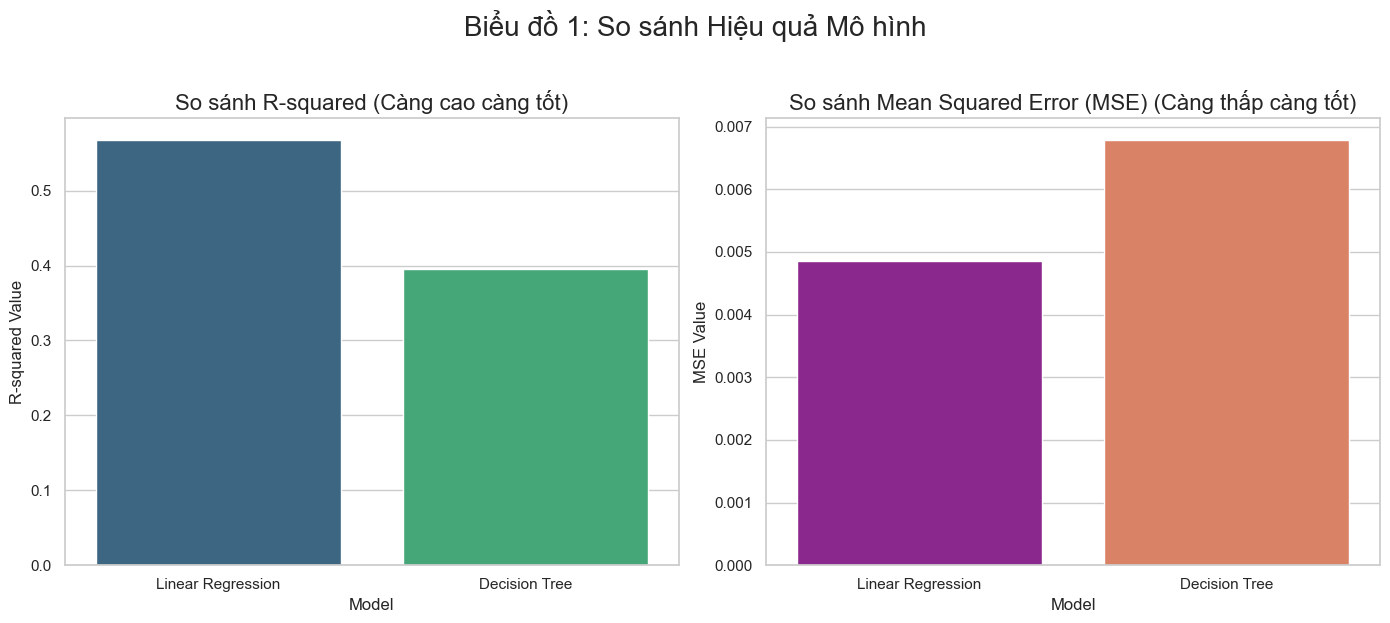

In [13]:
# 1. Tạo DataFrame từ các số liệu đã tính ở Cell 8, 9
metrics_data = {
    'Model': ['Linear Regression', 'Linear Regression', 'Decision Tree', 'Decision Tree'],
    'Metric_Type': ['R-squared', 'MSE', 'R-squared', 'MSE'],
    'Value': [r2_lr, mse_lr, r2_dt, mse_dt]
}
df_metrics = pd.DataFrame(metrics_data)

# 2. Vẽ 2 biểu đồ cột
plt.figure(figsize=(14, 6))

# Biểu đồ cho R-squared (R2)
plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='Value', data=df_metrics[df_metrics['Metric_Type'] == 'R-squared'], palette='viridis')
plt.title('So sánh R-squared (Càng cao càng tốt)', fontsize=16)
plt.ylabel('R-squared Value')

# Biểu đồ cho MSE (Lỗi)
plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='Value', data=df_metrics[df_metrics['Metric_Type'] == 'MSE'], palette='plasma')
plt.title('So sánh Mean Squared Error (MSE) (Càng thấp càng tốt)', fontsize=16)
plt.ylabel('MSE Value')

plt.suptitle('Biểu đồ 1: So sánh Hiệu quả Mô hình', fontsize=20, y=1.03)
plt.tight_layout()
plt.show()

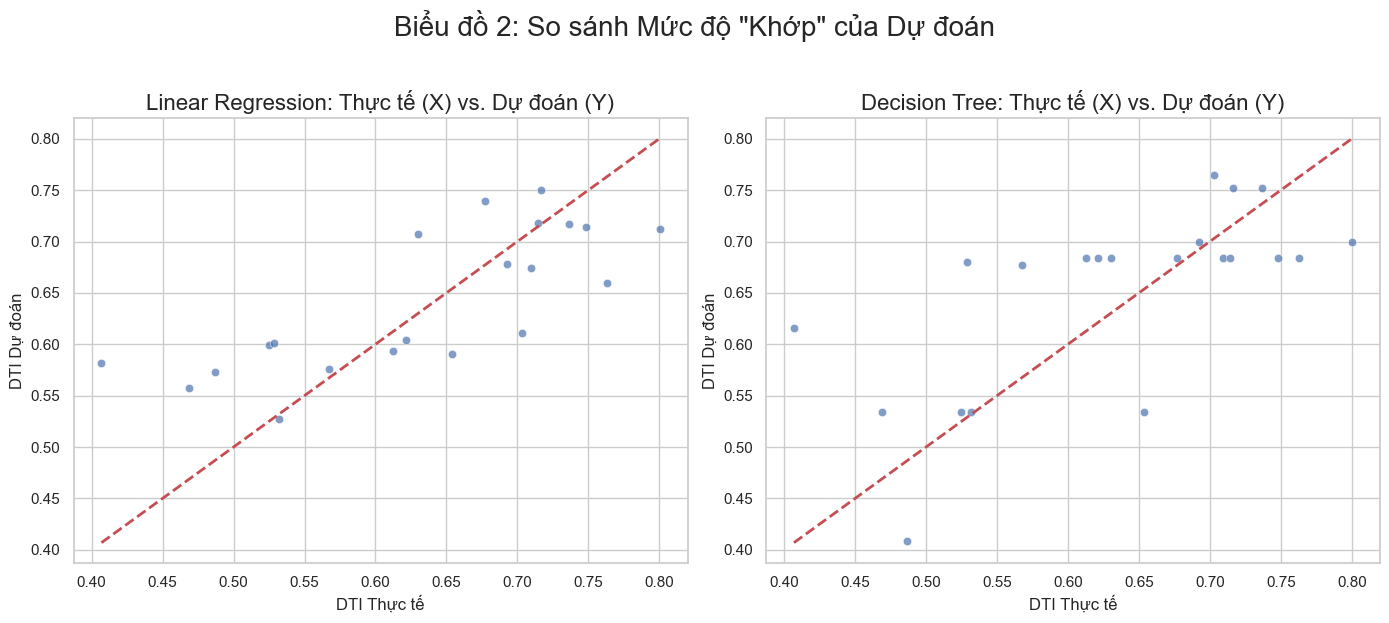

In [14]:
plt.figure(figsize=(14, 6))

# 1. Biểu đồ cho Linear Regression
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.7)
# Vẽ đường thẳng hoàn hảo (y=x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Linear Regression: Thực tế (X) vs. Dự đoán (Y)', fontsize=16)
plt.xlabel('DTI Thực tế')
plt.ylabel('DTI Dự đoán')

# 2. Biểu đồ cho Decision Tree
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_dt, alpha=0.7)
# Vẽ đường thẳng hoàn hảo (y=x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Decision Tree: Thực tế (X) vs. Dự đoán (Y)', fontsize=16)
plt.xlabel('DTI Thực tế')
plt.ylabel('DTI Dự đoán')

plt.suptitle('Biểu đồ 2: So sánh Mức độ "Khớp" của Dự đoán', fontsize=20, y=1.03)
plt.tight_layout()
plt.show()

In [15]:
# Lấy DataFrame từ Cell 10
# (Thêm cột 'Mức độ ảnh hưởng tuyệt đối' cho Linear Regression để so sánh công bằng)
lr_coeffs['Absolute_Coefficient'] = np.abs(lr_coeffs['Coefficient'])

plt.figure(figsize=(16, 8))

# 1. Biểu đồ cho Linear Regression
plt.subplot(1, 2, 1)
# Sắp xếp theo giá trị tuyệt đối
sns.barplot(x='Absolute_Coefficient', y='Feature', 
            data=lr_coeffs.sort_values(by='Absolute_Coefficient', ascending=False), 
            palette='coolwarm')
plt.title('Linear Regression - Mức độ Ảnh hưởng (Tuyệt đối)', fontsize=16)
plt.xlabel('Hệ số (Coefficient) Tuyệt đối')

# 2. Biểu đồ cho Decision Tree
plt.subplot(1, 2, 2)
# DataFrame dt_importances đã được sắp xếp từ Cell 10
sns.barplot(x='Importance', y='Feature', data=dt_importances, palette='light:g')
plt.title('Decision Tree - Mức độ Quan trọng (Importance)', fontsize=16)
plt.xlabel('Tỷ lệ Quan trọng (%)')

plt.suptitle('Biểu đồ 3: So sánh "Suy nghĩ" của 2 Mô hình', fontsize=20, y=1.03)
plt.tight_layout()
plt.show()

NameError: name 'lr_coeffs' is not defined

Đang chạy Cell 15 (đã sửa lỗi)...
Đang vẽ Biểu đồ 3: So sánh Mức độ Quan trọng...


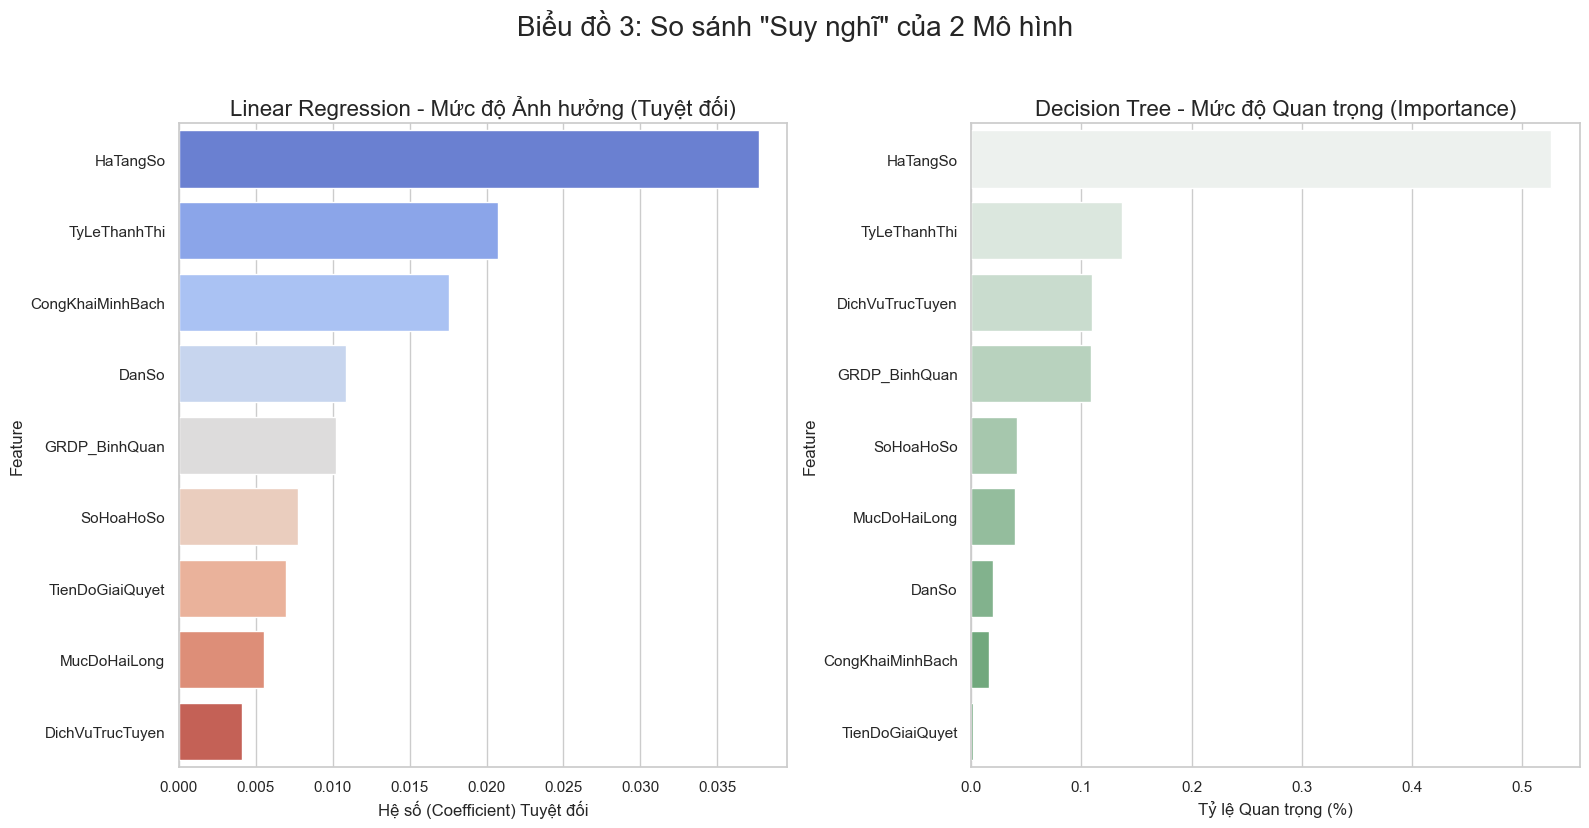

Vẽ biểu đồ thành công!


In [16]:
print("Đang chạy Cell 15 (đã sửa lỗi)...")

# --- ĐỊNH NGHĨA LẠI DATAFRAME TỪ CELL 10 ---
# (Để đảm bảo biến luôn tồn tại trước khi vẽ)

# 1. Lấy dữ liệu cho Linear Regression
lr_coeffs = pd.DataFrame({
    'Feature': feature_columns,
    'Coefficient': lr_model.coef_
}).sort_values(by='Coefficient', ascending=False)
# Thêm cột 'Mức độ ảnh hưởng tuyệt đối'
lr_coeffs['Absolute_Coefficient'] = np.abs(lr_coeffs['Coefficient'])

# 2. Lấy dữ liệu cho Decision Tree
dt_importances = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# --- BẮT ĐẦU VẼ BIỂU ĐỒ ---
print("Đang vẽ Biểu đồ 3: So sánh Mức độ Quan trọng...")
plt.figure(figsize=(16, 8))

# 1. Biểu đồ cho Linear Regression
plt.subplot(1, 2, 1)
# Sắp xếp theo giá trị tuyệt đối
sns.barplot(x='Absolute_Coefficient', y='Feature', 
            data=lr_coeffs.sort_values(by='Absolute_Coefficient', ascending=False), 
            palette='coolwarm')
plt.title('Linear Regression - Mức độ Ảnh hưởng (Tuyệt đối)', fontsize=16)
plt.xlabel('Hệ số (Coefficient) Tuyệt đối')

# 2. Biểu đồ cho Decision Tree
plt.subplot(1, 2, 2)
sns.barplot(x='Importance', y='Feature', data=dt_importances, palette='light:g')
plt.title('Decision Tree - Mức độ Quan trọng (Importance)', fontsize=16)
plt.xlabel('Tỷ lệ Quan trọng (%)')

plt.suptitle('Biểu đồ 3: So sánh "Suy nghĩ" của 2 Mô hình', fontsize=20, y=1.03)
plt.tight_layout()
plt.show()

print("Vẽ biểu đồ thành công!")

--- 'Độ chính xác' (R-squared) của 2 Mô hình ---
1. Linear Regression: 56.81%
2. Decision Tree:     39.60%

(R-squared: Tỷ lệ % sự thật mà mô hình giải thích được. Càng cao càng tốt.)


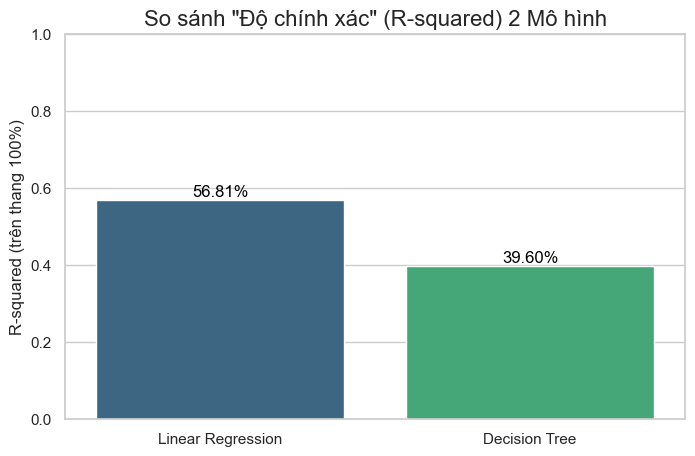

In [17]:
# Cell này giả định rằng Cell 8 và Cell 9 đã được chạy 
# và các biến 'r2_lr', 'r2_dt' đã có trong bộ nhớ.

print("--- 'Độ chính xác' (R-squared) của 2 Mô hình ---")

# Sử dụng f-string formatting (:.2%) để tự động chuyển
# số thập phân (0.5681) thành phần trăm (56.81%)
print(f"1. Linear Regression: {r2_lr:.2%}")
print(f"2. Decision Tree:     {r2_dt:.2%}")

print("\n(R-squared: Tỷ lệ % sự thật mà mô hình giải thích được. Càng cao càng tốt.)")

# Vẽ một biểu đồ cột đơn giản để so sánh
model_names = ['Linear Regression', 'Decision Tree']
r2_values = [r2_lr, r2_dt]

plt.figure(figsize=(8, 5))
bar_plot = sns.barplot(x=model_names, y=r2_values, palette='viridis')

# Thêm nhãn % lên trên các cột
for i, v in enumerate(r2_values):
    bar_plot.text(i, v + 0.01, f"{v:.2%}", color='black', ha='center', fontsize=12)

plt.title('So sánh "Độ chính xác" (R-squared) 2 Mô hình', fontsize=16)
plt.ylabel('R-squared (trên thang 100%)')
plt.ylim(0, 1.0) # Đặt trục Y từ 0% đến 100%
plt.show()

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

print("--- Tối ưu 1: Thử Biến đổi Log (Log Transform) ---")

# 1. Tạo một bản sao của X (từ Cell 6)
X_log_transformed = X.copy()

# 2. Áp dụng log transform cho các cột bị lệch (skewed)
# (np.log1p(x) = log(x+1), an toàn cho giá trị 0)
X_log_transformed['DanSo'] = np.log1p(X_log_transformed['DanSo'])
X_log_transformed['GRDP_BinhQuan'] = np.log1p(X_log_transformed['GRDP_BinhQuan'])

print("Đã áp dụng Log Transform cho 'DanSo' và 'GRDP_BinhQuan'.")
print("5 dòng đầu của X (đã biến đổi):")
display(X_log_transformed.head())

# 3. CHẠY LẠI TOÀN BỘ QUY TRÌNH với dữ liệu MỚI

# 3.1. Chuẩn hóa (Scale)
# (Chúng ta fit scaler MỚI cho dữ liệu MỚI)
scaler_log = StandardScaler()
X_log_scaled = scaler_log.fit_transform(X_log_transformed)

# 3.2. Chia (Split)
# (y vẫn như cũ, random_state=42 để đảm bảo chia giống hệt)
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(
    X_log_scaled, y, test_size=0.2, random_state=42
)

# 3.3. Huấn luyện lại Linear Regression
lr_model_log = LinearRegression()
lr_model_log.fit(X_train_log, y_train_log)
y_pred_lr_log = lr_model_log.predict(X_test_log)

# 3.4. Đánh giá
r2_lr_log = r2_score(y_test_log, y_pred_lr_log)

print("\n--- KẾT QUẢ SAU KHI LOG TRANSFORM ---")
print(f"R-squared (Mô hình cũ):     {r2_lr:.4f} (tức {r2_lr:.2%})")
print(f"R-squared (Mô hình Tối ưu): {r2_lr_log:.4f} (tức {r2_lr_log:.2%})")

--- Tối ưu 1: Thử Biến đổi Log (Log Transform) ---
Đã áp dụng Log Transform cho 'DanSo' và 'GRDP_BinhQuan'.
5 dòng đầu của X (đã biến đổi):


,HaTangSo,DanSo,GRDP_BinhQuan,TyLeThanhThi,CongKhaiMinhBach,TienDoGiaiQuyet,DichVuTrucTuyen,MucDoHaiLong,SoHoaHoSo
0,0.8253,7.107589,4.634729,87.452877,7.71,17.30,5.82,16.30,9.19
1,0.8258,9.147475,5.077671,77.722398,3.92,19.40,3.54,17.73,15.25
2,0.7648,7.218104,5.291796,67.253650,5.87,19.08,5.58,17.76,9.38
3,0.6823,7.057209,4.060443,52.818480,9.34,16.49,5.79,16.97,9.84
4,0.7233,7.133535,4.477337,70.502276,8.69,16.40,5.39,16.93,6.50



--- KẾT QUẢ SAU KHI LOG TRANSFORM ---
R-squared (Mô hình cũ):     0.5681 (tức 56.81%)
R-squared (Mô hình Tối ưu): 0.5724 (tức 57.24%)


In [19]:
from sklearn.linear_model import LassoCV, RidgeCV

# Chúng ta sẽ dùng lại dữ liệu GỐC (đã scale) từ Cell 7
# (X_train, X_test, y_train, y_test)

print("--- Tối ưu 2: Thử Regularization (Lasso & Ridge) ---")

# --- 1. Huấn luyện LassoCV ---
# (cv=5: thử 5-fold cross-validation)
lasso_model = LassoCV(cv=5, random_state=42)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"\nKết quả LassoCV (tự tìm alpha={lasso_model.alpha_:.4f}):")
print(f"  R-squared (Lasso): {r2_lasso:.4f} (tức {r2_lasso:.2%})")


# --- 2. Huấn luyện RidgeCV ---
# (alphas: danh sách các mức phạt để thử)
ridge_model = RidgeCV(alphas=np.logspace(-6, 6, 13), cv=5)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"\nKết quả RidgeCV (tự tìm alpha={ridge_model.alpha_:.4f}):")
print(f"  R-squared (Ridge): {r2_ridge:.4f} (tức {r2_ridge:.2%})")

print("\n--- SO SÁNH VỚI MÔ HÌNH CŨ ---")
print(f"R-squared (Linear Regression): {r2_lr:.2%}")
print(f"R-squared (Lasso Regression):  {r2_lasso:.2%}")
print(f"R-squared (Ridge Regression):  {r2_ridge:.2%}")

--- Tối ưu 2: Thử Regularization (Lasso & Ridge) ---

Kết quả LassoCV (tự tìm alpha=0.0060):
  R-squared (Lasso): 0.5419 (tức 54.19%)

Kết quả RidgeCV (tự tìm alpha=100.0000):
  R-squared (Ridge): 0.4340 (tức 43.40%)

--- SO SÁNH VỚI MÔ HÌNH CŨ ---
R-squared (Linear Regression): 56.81%
R-squared (Lasso Regression):  54.19%
R-squared (Ridge Regression):  43.40%


In [20]:
print("--- Phân tích Đặc trưng của Lasso ---")
# Lấy các hệ số (coefficients) từ mô hình Lasso
lasso_coeffs = pd.DataFrame({
    'Feature': feature_columns,
    'Coefficient': lasso_model.coef_
})

# Sắp xếp
lasso_coeffs_sorted = lasso_coeffs.sort_values(by='Coefficient', ascending=False)

print("Các đặc trưng mà Lasso giữ lại (Coefficient != 0):")
display(lasso_coeffs_sorted[lasso_coeffs_sorted['Coefficient'] != 0])

print("\nCác đặc trưng mà Lasso loại bỏ (Coefficient == 0):")
display(lasso_coeffs_sorted[lasso_coeffs_sorted['Coefficient'] == 0])

--- Phân tích Đặc trưng của Lasso ---
Các đặc trưng mà Lasso giữ lại (Coefficient != 0):


,Feature,Coefficient
0,HaTangSo,0.037823
3,TyLeThanhThi,0.018733
4,CongKhaiMinhBach,0.012404
8,SoHoaHoSo,0.009773
2,GRDP_BinhQuan,0.007044
1,DanSo,0.005366



Các đặc trưng mà Lasso loại bỏ (Coefficient == 0):


,Feature,Coefficient
5,TienDoGiaiQuyet,-0.0
6,DichVuTrucTuyen,0.0
7,MucDoHaiLong,0.0


In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV # Thư viện để "dò" tham số

print("--- Tối ưu 3: Thử mô hình Random Forest ---")

# Chúng ta dùng lại dữ liệu GỐC (đã scale) từ Cell 7
# (X_train, X_test, y_train, y_test)

# 1. Khởi tạo mô hình
rf_model = RandomForestRegressor(random_state=42)

# 2. (Nâng cao) Dò tìm tham số tốt nhất
# Đây là các "thiết lập" cho mô hình
param_grid = {
    'n_estimators': [50, 100, 150], # Số lượng "cây" trong rừng
    'max_depth': [5, 10, None],     # Độ sâu tối đa của mỗi cây
    'min_samples_leaf': [1, 2, 4]  # Số mẫu tối thiểu ở 1 "lá"
}

# GridSearchCV sẽ tự động thử 3x3x3 = 27 tổ hợp và tìm ra cái tốt nhất
# cv=3: Dùng 3-fold cross-validation (để tránh overfitting)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, 
                           scoring='r2', n_jobs=-1, verbose=1)

# 3. Huấn luyện (GridSearch sẽ tự huấn luyện)
print("Bắt đầu dò tìm tham số tốt nhất cho Random Forest...")
grid_search.fit(X_train, y_train)

print(f"\nTham số tốt nhất tìm được: {grid_search.best_params_}")

# 4. Đánh giá mô hình TỐT NHẤT
best_rf_model = grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)

print("\n--- KẾT QUẢ SO SÁNH ---")
print(f"R-squared (Linear Regression): {r2_lr:.2%}")
print(f"R-squared (Random Forest Tối ưu): {r2_rf:.2%}")

--- Tối ưu 3: Thử mô hình Random Forest ---
Bắt đầu dò tìm tham số tốt nhất cho Random Forest...
Fitting 3 folds for each of 27 candidates, totalling 81 fits

Tham số tốt nhất tìm được: {'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 150}

--- KẾT QUẢ SO SÁNH ---
R-squared (Linear Regression): 56.81%
R-squared (Random Forest Tối ưu): 67.07%


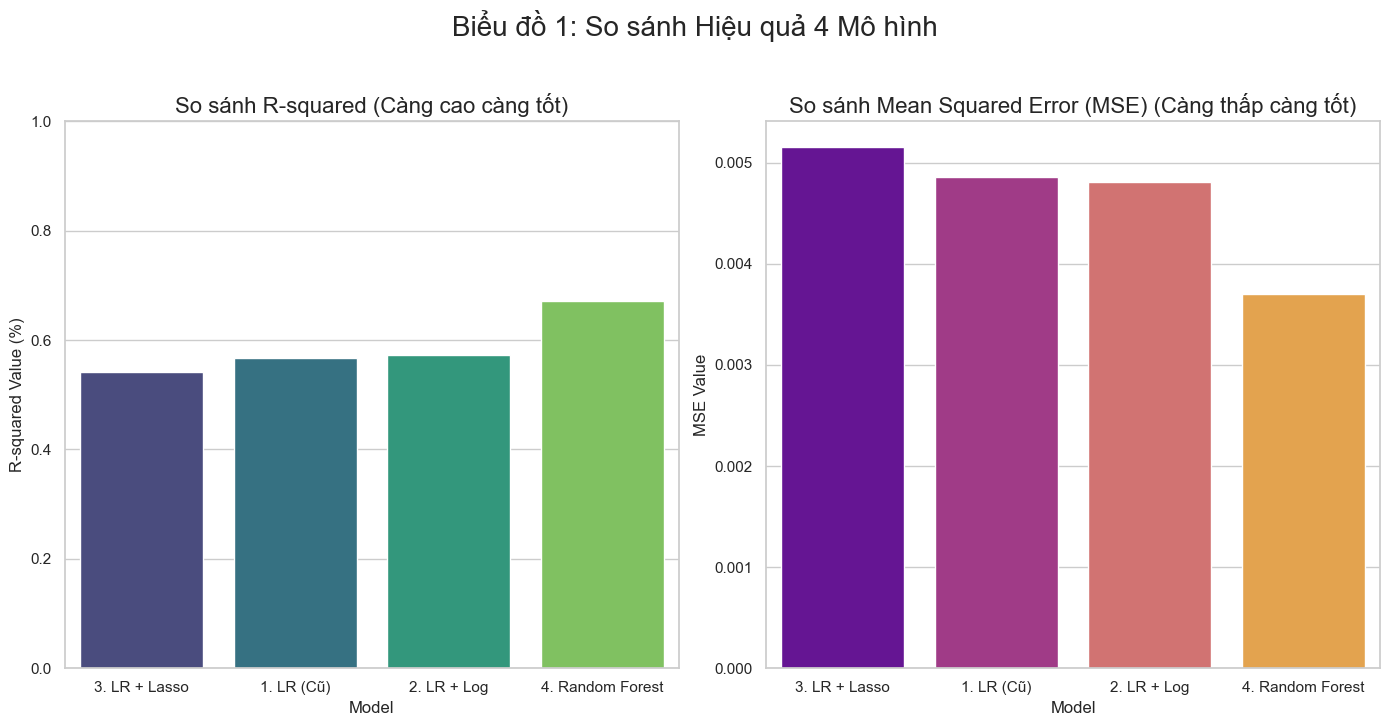

In [22]:
# --- Tính toán các chỉ số MSE còn thiếu ---
# (Chúng ta cần các chỉ số này để so sánh đầy đủ)
mse_lr_log = mean_squared_error(y_test_log, y_pred_lr_log)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mse_rf = mean_squared_error(y_test, y_pred_rf)

# --- Tạo DataFrame R-squared ---
r2_data = {
    'Model': [
        '1. LR (Cũ)', 
        '2. LR + Log', 
        '3. LR + Lasso', 
        '4. Random Forest'
    ],
    'R-squared': [r2_lr, r2_lr_log, r2_lasso, r2_rf]
}
df_r2 = pd.DataFrame(r2_data)

# --- Tạo DataFrame MSE ---
mse_data = {
    'Model': [
        '1. LR (Cũ)', 
        '2. LR + Log', 
        '3. LR + Lasso', 
        '4. Random Forest'
    ],
    'MSE': [mse_lr, mse_lr_log, mse_lasso, mse_rf]
}
df_mse = pd.DataFrame(mse_data)


# --- Bắt đầu vẽ ---
plt.figure(figsize=(14, 7))

# Biểu đồ cho R-squared (R2)
plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='R-squared', data=df_r2.sort_values('R-squared'), palette='viridis')
plt.title('So sánh R-squared (Càng cao càng tốt)', fontsize=16)
plt.ylabel('R-squared Value (%)')
plt.ylim(0, 1.0) # Trục Y từ 0 đến 100%

# Biểu đồ cho MSE (Lỗi)
plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='MSE', data=df_mse.sort_values('MSE', ascending=False), palette='plasma')
plt.title('So sánh Mean Squared Error (MSE) (Càng thấp càng tốt)', fontsize=16)
plt.ylabel('MSE Value')

plt.suptitle('Biểu đồ 1: So sánh Hiệu quả 4 Mô hình', fontsize=20, y=1.03)
plt.tight_layout()
plt.show()

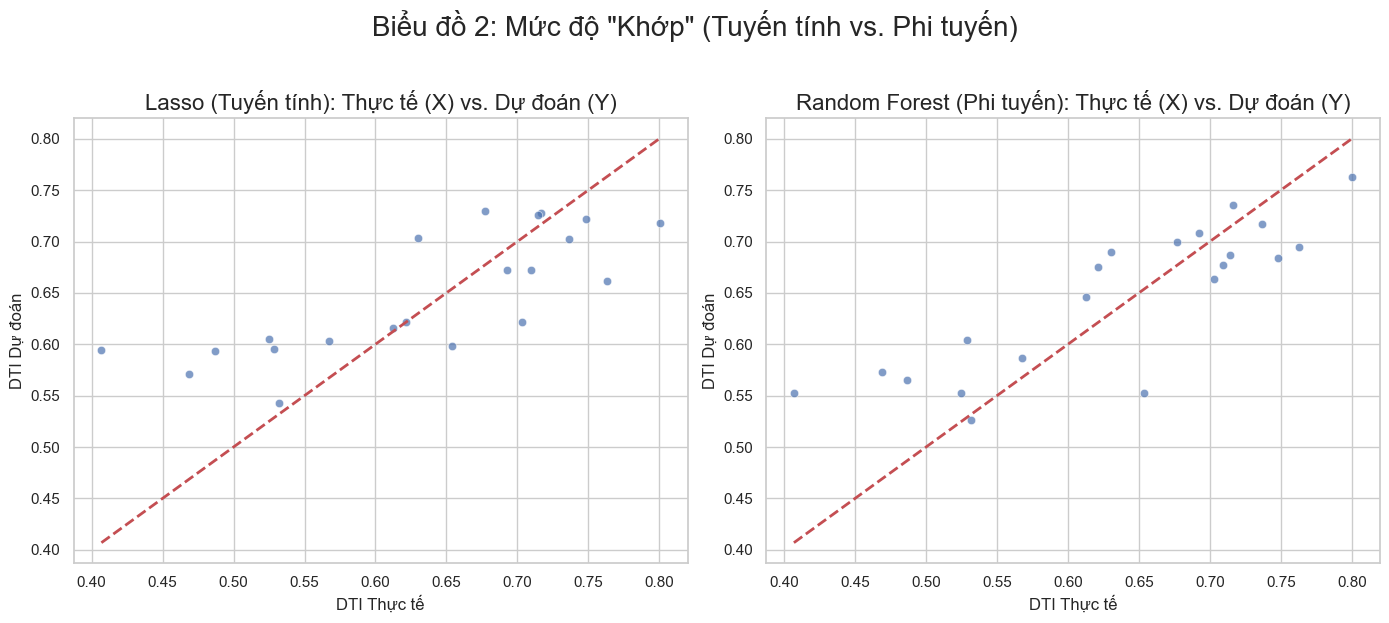

In [23]:
plt.figure(figsize=(14, 6))

# 1. Biểu đồ cho Lasso (Đại diện cho mô hình tuyến tính tối ưu)
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_lasso, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Lasso (Tuyến tính): Thực tế (X) vs. Dự đoán (Y)', fontsize=16)
plt.xlabel('DTI Thực tế')
plt.ylabel('DTI Dự đoán')

# 2. Biểu đồ cho Random Forest (Phi tuyến)
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Random Forest (Phi tuyến): Thực tế (X) vs. Dự đoán (Y)', fontsize=16)
plt.xlabel('DTI Thực tế')
plt.ylabel('DTI Dự đoán')

plt.suptitle('Biểu đồ 2: Mức độ "Khớp" (Tuyến tính vs. Phi tuyến)', fontsize=20, y=1.03)
plt.tight_layout()
plt.show()

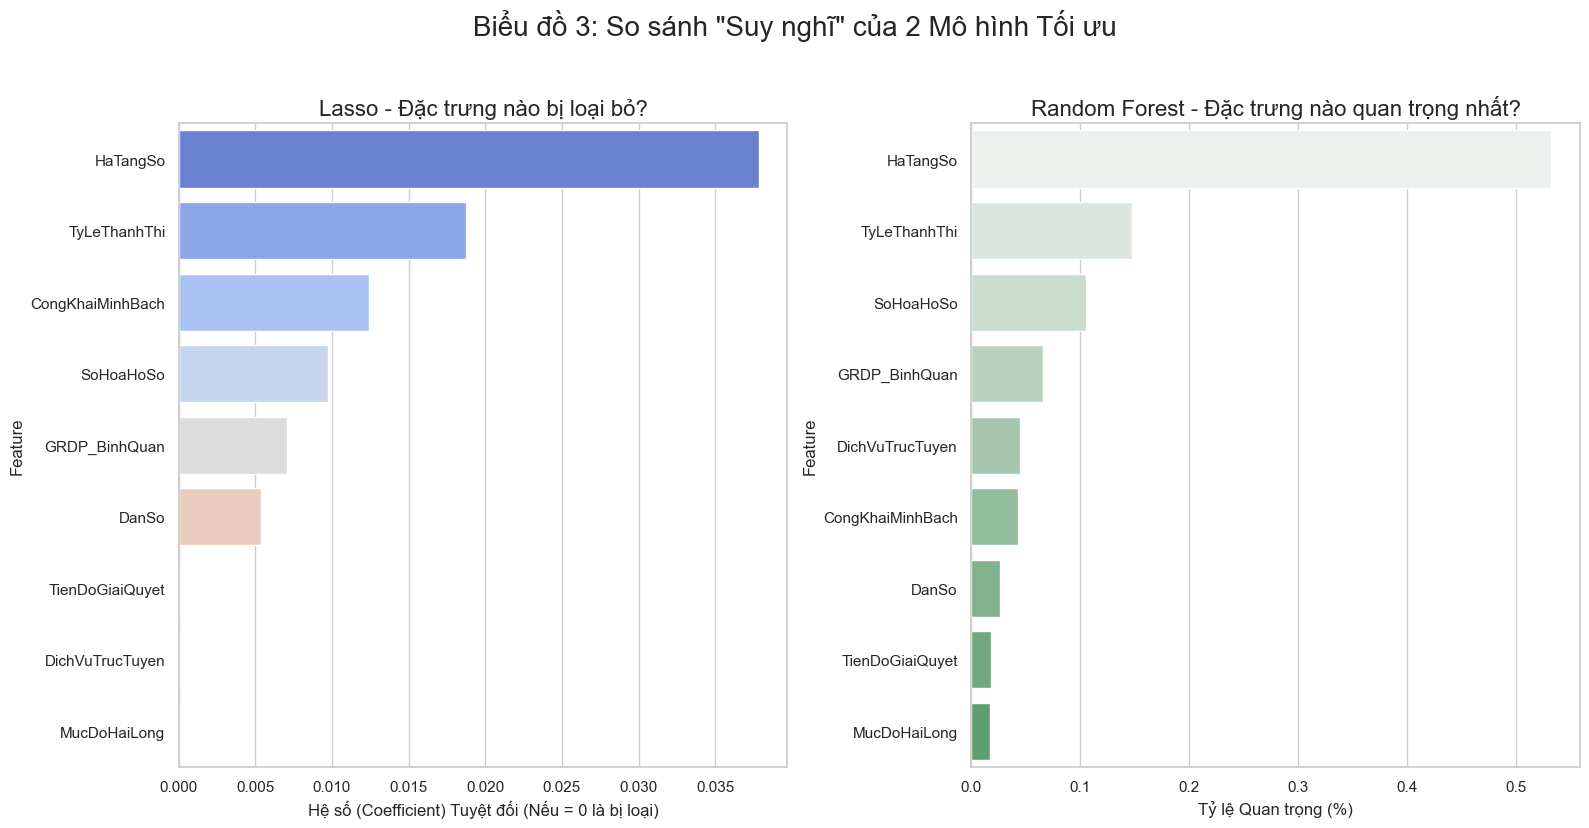

In [24]:
# Lấy DataFrame từ Cell 19 (Lasso)
lasso_coeffs['Absolute_Coefficient'] = np.abs(lasso_coeffs['Coefficient'])

# Lấy DataFrame cho Random Forest (từ Cell 20)
rf_importances = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': best_rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# --- Bắt đầu vẽ ---
plt.figure(figsize=(16, 8))

# 1. Biểu đồ cho Lasso
plt.subplot(1, 2, 1)
sns.barplot(x='Absolute_Coefficient', y='Feature', 
            data=lasso_coeffs.sort_values(by='Absolute_Coefficient', ascending=False), 
            palette='coolwarm')
plt.title('Lasso - Đặc trưng nào bị loại bỏ?', fontsize=16)
plt.xlabel('Hệ số (Coefficient) Tuyệt đối (Nếu = 0 là bị loại)')

# 2. Biểu đồ cho Random Forest
plt.subplot(1, 2, 2)
sns.barplot(x='Importance', y='Feature', data=rf_importances, palette='light:g')
plt.title('Random Forest - Đặc trưng nào quan trọng nhất?', fontsize=16)
plt.xlabel('Tỷ lệ Quan trọng (%)')

plt.suptitle('Biểu đồ 3: So sánh "Suy nghĩ" của 2 Mô hình Tối ưu', fontsize=20, y=1.03)
plt.tight_layout()
plt.show()